<a href="https://colab.research.google.com/github/GergelyTuri/fiberphotometry/blob/annas/notebooks/pcb_experiments/anna_notebooks/behavior_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -b annas https://github.com/GergelyTuri/fiberphotometry.git

Cloning into 'fiberphotometry'...
remote: Enumerating objects: 407, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 407 (delta 84), reused 92 (delta 32), pack-reused 245
Receiving objects: 100% (407/407), 27.54 MiB | 10.47 MiB/s, done.
Resolving deltas: 100% (207/207), done.
Updating files: 100% (52/52), done.


In [2]:
%cd fiberphotometry

/content/fiberphotometry


In [3]:
!pip install .

Processing /content/fiberphotometry
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 2.8 MB/s eta 0:00:00
  Created wheel for fiber-photometry-analysis: filename=fiber_photometry_analysis-0.1-py3-none-any.whl size=9360 sha256=230a3b7eb32aa986bcaeab9044a31a26d3faa3234f2c07f6cfa8cff4daf5ef3d
  Stored in directory: /tmp/pip-ephem-wheel-cache-d0ya22o2/wheels/4b/b6/cf/916d1f43d06b8bc573d2ec7471e525018bf5ea7bcf83b8e670
Successfully built fiber-photometry-analysis


In [6]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [20]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), 348 bytes | 174.00 KiB/s, done.
From https://github.com/GergelyTuri/fiberphotometry
   f7c8090..b1283db  annas      -> origin/annas
Updating f7c8090..b1283db
Fast-forward
 Anna/behavior_analysis.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [8]:
from Anna.behavior_analysis import time_to_seconds, process_behavior_data, calculate_behavior_frequencies, ensure_all_behaviors
from Anna.behavior_analysis import calculate_z_score_differences
from Anna.behavior_plotting import plot_z_score_differences_v2
import numpy as np


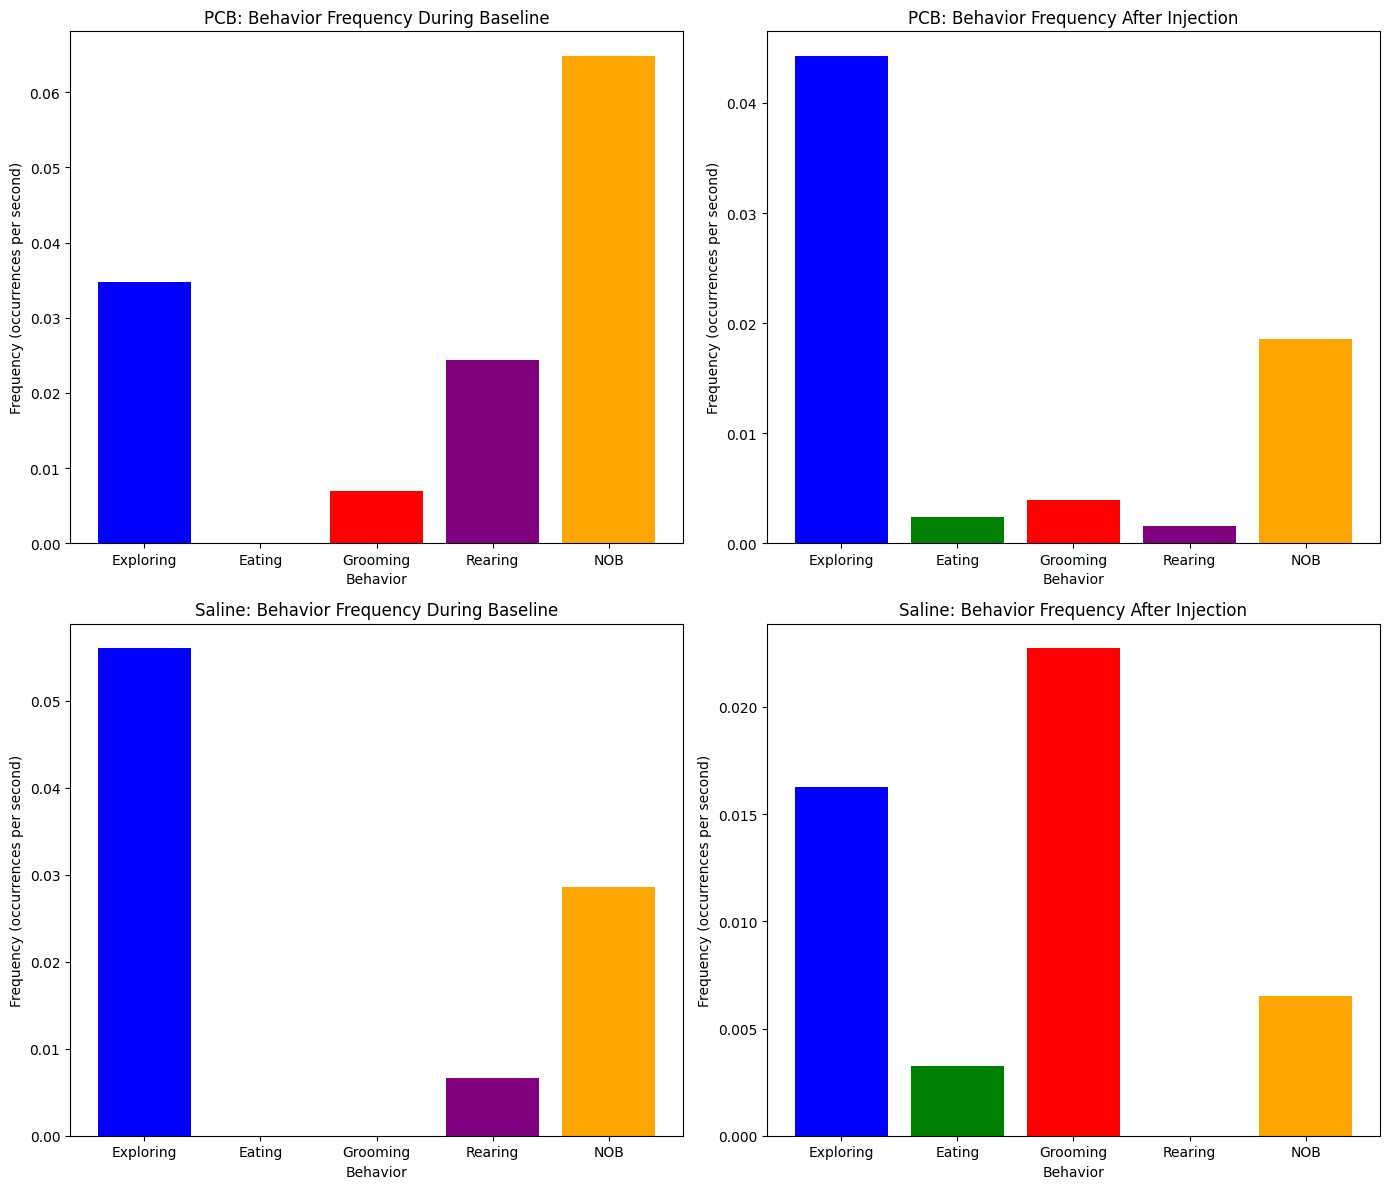

In [ ]:

def main():
    behavior_labels = {
        'p': 'Exploring',
        'e': 'Eating',
        'g': 'Grooming',
        'r': 'Rearing',
        's': 'NOB'
    }
    colors = ['blue', 'green', 'red', 'purple', 'orange']

    # Define the file paths and times
    pcb_file_path = '/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/behavior_nia11_pcb - Sheet1 (1).csv'
    saline_file_path = '/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/behavior_nia11_control - Sheet1.csv'
    pcb_start_time_str = '10:52:44am'
    pcb_injection_time_str = '11:21:31am'
    saline_start_time_str = '2:23:43pm'
    saline_injection_time_str = '2:38:53pm'

    # Process PCB behavior data
    pcb_baseline_df, pcb_post_injection_df, pcb_baseline_duration, pcb_post_injection_duration = process_behavior_data(pcb_file_path, pcb_start_time_str, pcb_injection_time_str)
    pcb_baseline_frequencies = calculate_behavior_frequencies(pcb_baseline_df, pcb_baseline_duration)
    pcb_post_injection_frequencies = calculate_behavior_frequencies(pcb_post_injection_df, pcb_post_injection_duration)

    # Process saline behavior data
    saline_baseline_df, saline_post_injection_df, saline_baseline_duration, saline_post_injection_duration = process_behavior_data(saline_file_path, saline_start_time_str, saline_injection_time_str)
    saline_baseline_frequencies = calculate_behavior_frequencies(saline_baseline_df, saline_baseline_duration)
    saline_post_injection_frequencies = calculate_behavior_frequencies(saline_post_injection_df, saline_post_injection_duration)

    # Ensure all behaviors are accounted for
    ensure_all_behaviors(pcb_baseline_frequencies, behavior_labels)
    ensure_all_behaviors(pcb_post_injection_frequencies, behavior_labels)
    ensure_all_behaviors(saline_baseline_frequencies, behavior_labels)
    ensure_all_behaviors(saline_post_injection_frequencies, behavior_labels)

    # Plot the behavior frequencies
    plot_behavior_frequencies(pcb_baseline_frequencies, pcb_post_injection_frequencies, saline_baseline_frequencies, saline_post_injection_frequencies, behavior_labels, colors)

if __name__ == "__main__":
    main()



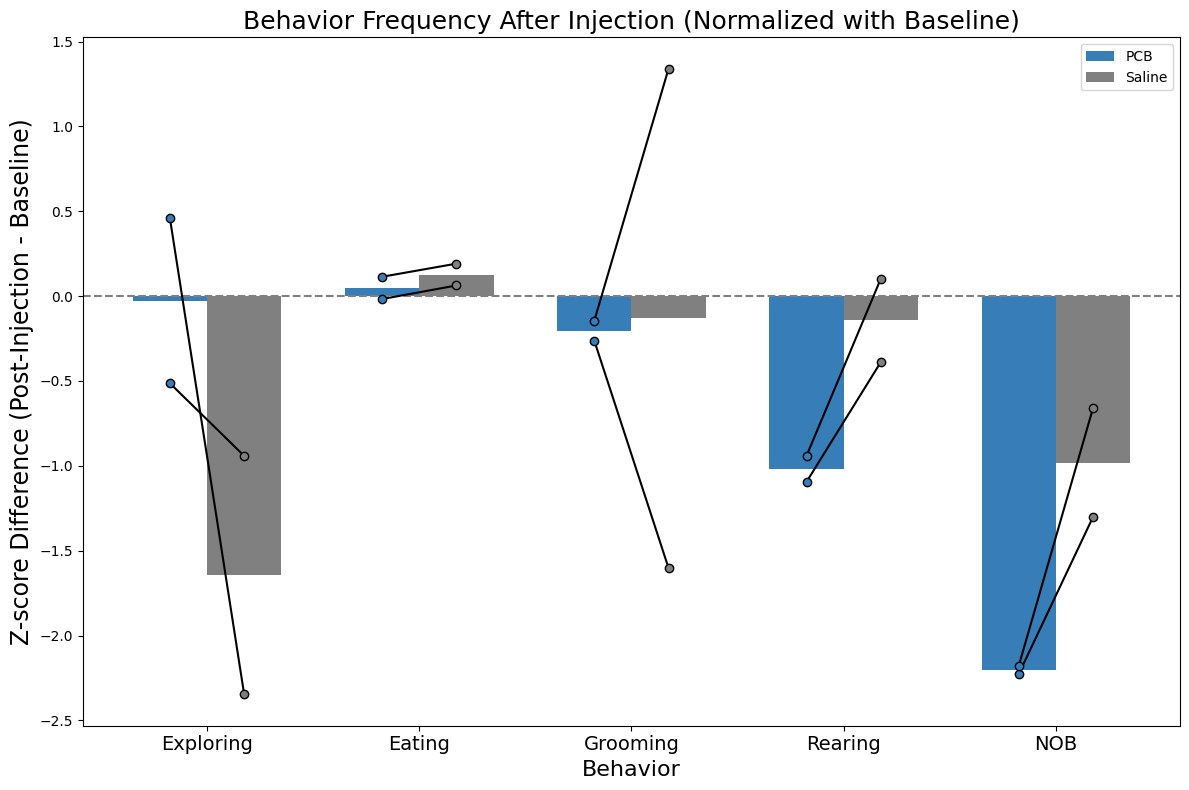

In [9]:

def main_v2():
    behavior_labels = {
        'p': 'Exploring',
        'e': 'Eating',
        'g': 'Grooming',
        'r': 'Rearing',
        's': 'NOB'
    }
    colors = ['#377eb8', '#808080', '#e41a1c', '#984ea3', '#ff7f00']

    file_paths = {
        'pcb_mouse1': ('/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/behavior_nia11_pcb - Sheet1 (1).csv', '10:52:44am', '11:21:31am'),
        'pcb_mouse2': ('/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/nia2_behavior_pcb - Sheet1 (1).csv', '9:43:48am', '10:09:23am'),
        'saline_mouse1': ('/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/behavior_nia11_control - Sheet1.csv', '2:23:43pm', '2:38:53pm'),
        'saline_mouse2': ('/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/PCB_Serotonin/behavior_nia2_control - Sheet1 (1).csv', '1:30:14pm', '1:46:05pm')
    }

    # Initialize dictionaries to store the aggregated Z-score differences
    z_score_differences_pcb = {key: [] for key in behavior_labels.keys()}
    z_score_differences_saline = {key: [] for key in behavior_labels.keys()}

    # Process each file and accumulate Z-score differences
    for condition, (file_path, start_time_str, injection_time_str) in file_paths.items():
        baseline_behavior_df, post_injection_behavior_df, baseline_duration, post_injection_duration = process_behavior_data(file_path, start_time_str, injection_time_str)
        baseline_frequencies = calculate_behavior_frequencies(baseline_behavior_df, baseline_duration)
        post_injection_frequencies = calculate_behavior_frequencies(post_injection_behavior_df, post_injection_duration)

        # Ensure all behaviors are in the dictionaries, even if their frequency is zero
        ensure_all_behaviors(baseline_frequencies, behavior_labels)
        ensure_all_behaviors(post_injection_frequencies, behavior_labels)

        # Calculate Z-scores for baseline and post-injection frequencies
        z_score_differences = calculate_z_score_differences(baseline_frequencies, post_injection_frequencies)

        if 'pcb' in condition:
            for key in z_score_differences_pcb.keys():
                z_score_differences_pcb[key].append(z_score_differences[key])
        else:
            for key in z_score_differences_saline.keys():
                z_score_differences_saline[key].append(z_score_differences[key])

    # Average the Z-score differences
    z_score_differences_pcb_mean = {key: np.mean(z_score_differences_pcb[key]) for key in z_score_differences_pcb.keys()}
    z_score_differences_saline_mean = {key: np.mean(z_score_differences_saline[key]) for key in z_score_differences_saline.keys()}

    # Plot the behavior frequencies
    plot_z_score_differences_v2(z_score_differences_pcb_mean, z_score_differences_saline_mean, z_score_differences_pcb, z_score_differences_saline, behavior_labels)

if __name__ == "__main__":
    main_v2()
